In [4]:
execfile('pysrc/RPC_Hydro.py')

In [4]:
lums = 2.5*u.ld.Lsun * 10.**np.array([12,9,10,11,13,8])
names = ['B2D_N512_R100_40%dD'%i for i in range(len(lums))]
# nSnapshots = 33,135,103,70,1
nSnapshot = 256
qAs = [pp.Run(names[i],nSnapshot,r=100.,v0=u.ld.pc/u.ld.yr,L0=u.ld.pc,
           rho0=1e-20,L=lums[i],optFrac=0.514) for i in range(len(lums)) if i!=4]

In [5]:
# qs = qAs[5:] + qAs[1:4] + qAs[:1]
# qRP = qs[-1]
# qGP = qs[0]
qs = qAs

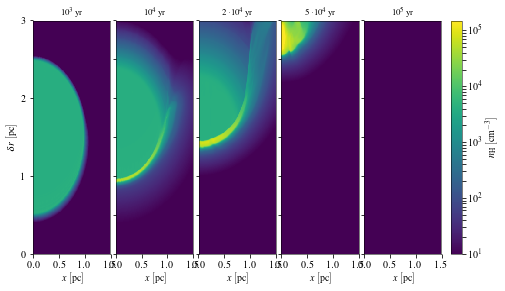

In [9]:
execfile('pysrc/RPC_Hydro.py')
iSnapshots = [1,10,20,50,100]
for i,q in enumerate((qs[0],qs[1])):
    cb = nTplot2D_new(q,iSnapshots,('nH',),rngs=((10,1.5e5),))    
    u.savefig(u.figureDir+'images_nT_%s.png'%q.name,dpi=300)

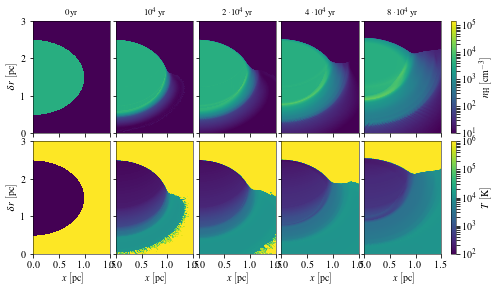

In [8]:
execfile('pysrc/RPC_Hydro.py')
iSnapshots = [0,100,200,400,800]
cb = nTplot2D_new(qGP,iSnapshots,('nH','T'),rngs=((10,1.5e5),(100,1e6)))
# u.savefig(u.figureDir+'images_nT_%s.png'%qGP.name,dpi=600)

* change GP sim to small radii

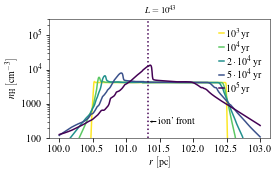

In [12]:
execfile('pysrc/RPC_Hydro.py')
iSnapshots = [1,10,20,50,100]
for i,q in enumerate((qs[0],qs[1])):
#     iSnapshots = ([0,100,200],[0,300,600,900])[irun]
    skewers((q,),'r',('nH',),rngs=((100,3e5),(1e2,1e6)), iTs=iSnapshots,ix=10)
    title(r'$L=10^{%.0f}$'%log(q.LAGN))
    axhline(1e21,c='k',ls=':')
    u.mysavefig('skewers_vs_dr_%s'%q.name,bbox_inches='tight')

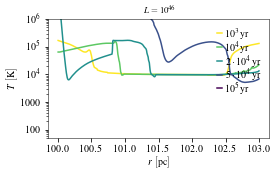

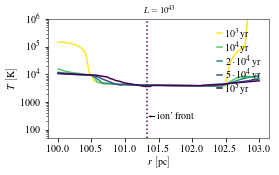

In [13]:
execfile('pysrc/RPC_Hydro.py')
for i,q in enumerate((qs[0],qs[1])):
#     iSnapshots = ([0,100,200],[0,300,600,900])[irun]
    skewers((q,),'r',('T',),rngs=((50,1e6),), iTs=iSnapshots,ix=10)
    title(r'$L=10^{%.0f}$'%log(q.LAGN))
    axhline(1e21,c='k',ls=':')
    u.mysavefig('skewers_vs_dr_%s'%q.name,bbox_inches='tight')

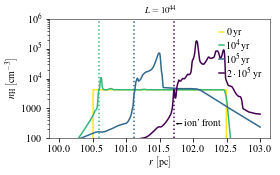

In [20]:
execfile('pysrc/RPC_Hydro.py')
iSnapshots = [0,10,100,200]
for i,q in enumerate((qs[1],)):
#     iSnapshots = ([0,100,200],[0,300,600,900])[irun]
    skewers((q,),'r',('nH',),rngs=((100,1e6),), iTs=iSnapshots,ix=10)
    title(r'$L=10^{%.0f}$'%log(q.LAGN))
    axhline(1e21,c='k',ls=':')
    u.mysavefig('skewers_vs_dr_%s'%q.name,bbox_inches='tight')

IndexError: list index out of range

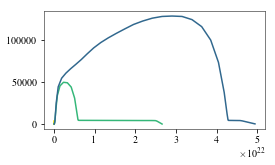

In [7]:
execfile('pysrc/RPC_Hydro.py')
iSnapshots = [0,10,30,100]
for i,q in enumerate(qs[:1]):
    skewers((q,),'NH',('nH',),rngs=((100,3e5),), iTs=iSnapshots,ix=20)
    semilogx()
    u.mysavefig('skewers_vs_NH_%s'%q.name,bbox_inches='tight')

* need more snapshots in RPC sim
* change GP sim to small radii

loading snapshot #3


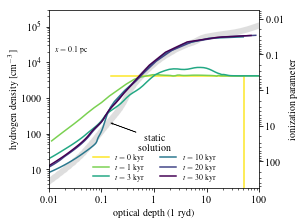

In [8]:
execfile('pysrc/RPC_Hydro.py')
comparison_to_static_solution_by_time(qs[0],iTs=(0,1,3,10,20,30),var='nH',rng=(10,1.5e5),ix=10)
u.mysavefig('comparison_to_static_solution_by_time_%s'%qs[0].name,bbox_inches='tight')

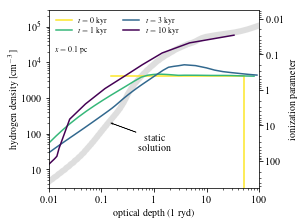

In [19]:
execfile('pysrc/RPC_Hydro.py')
comparison_to_static_solution_by_time(qAs[0],iTs=(0,1,3,10),var='nH',rng=(10,1.5e5),ix=10)
u.mysavefig('comparison_to_static_solution_by_time_%s'%qs[0].name,bbox_inches='tight')

* update RP solution
* recalculate static solution with same equations as in sim

In [5]:
execfile('pysrc/RPC_Hydro.py')
comparison_to_static_solution_by_x(qs[0],iT=20,var='nH',
                                   rng=(10,1.5e5),
                                   ixs=np.array([40,240,500,720,980])//4,dx=10)
# savefig(u.figureDir+'comparison_to_static_solution__by_x_%s.png'%qs[3].name,bbox_inches='tight',dpi=600)

NameError: name 'qs' is not defined

* plot the actual velocities, and the luminosities

In [43]:
xs = run[iSnapshot].x.cgs()
rs = run[iSnapshot].r.cgs()

In [47]:
rs[1]-rs[0], xs[1]-xs[0]

(0.005859375, 0.005858948492578124)

In [14]:
run = qs[1]
iSnapshots = np.arange(0,100,10)
ts = iSnapshots*1000*un.yr
fronts = np.zeros(iSnapshots.shape)
fronts[0] = 0.5
for iiSnapshot,iSnapshot in enumerate(iSnapshots):
#     front = (run[iSnapshot].fHII.cgs()[:,20]<0.1).nonzero()[0]
    front = (run[iSnapshot].nH.cgs()[:,20]>300).nonzero()[0]
    if iSnapshot>0 and len(front):
        fronts[iiSnapshot] = run[iSnapshot].x.cgs()[front[0]] # equals dr
v = 10*un.km/un.s 
analytic = fronts[0] - (v*ts).to('pc').value
print(fronts)

loading snapshot #0
loading snapshot #60
loading snapshot #70
loading snapshot #80
loading snapshot #90
[0.5        0.41305587 0.36618428 0.34860744 0.34860744 0.36618428
 0.37204323 0.38376113 0.39547902 0.41891482]


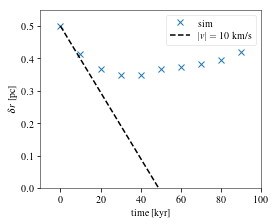

In [15]:
figure(figsize=(rc.fig_width/2,3))
plot(ts/1000.,fronts,'x',label='sim')
plot(ts/1000.,analytic,'-',c='k',ls='--',label=r'$|v|=10$ km/s')
legend()
xlabel(r'time [kyr]')
ylabel(r'$\delta r$ [pc]')
ylim(0,0.55)
xlim(-10,100)
u.mysavefig('ion_front_velocity_%s'%run.name,bbox_inches='tight')

In [16]:
execfile('pysrc/RPC_Hydro.py')
iTs=[30]
res = r_dependence_calc(qs,iTs=iTs)
u.send(res,'pyobjs/dependence_on_r_new.pyobj')

loading snapshot #30
loading snapshot #30
loading snapshot #30


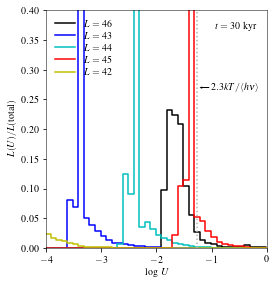

In [17]:
execfile('pysrc/RPC_Hydro.py')
r_dependence_figs_new(u.pickle.load(file('pyobjs/dependence_on_r_new.pyobj')),qs[:],
                      save=False,
                     norm_by_Lbol=False,iT0=iTs[0])
u.mysavefig('luminosity_weighted_U',bbox_inches='tight')

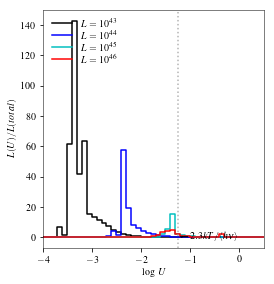

In [62]:
execfile('pysrc/RPC_Hydro.py')
r_dependence_figs_new(u.pickle.load(file('pyobjs/dependence_on_r_new.pyobj')),qs[:],
                      save=False,
                     norm_by_Lbol=True)

* when not normalizing by total luminosity, we get a total luminosity x30 L_bol
* need at least one more sim in RPC limit
* maybe change to different L (10^43 - 10^47) instead of different r

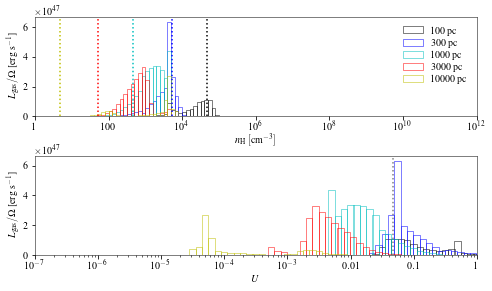

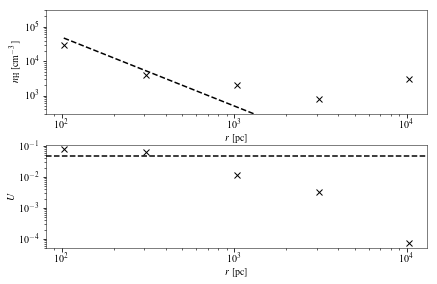

In [207]:
r_dependence_figs(u.pickle.load(file('pyobjs/dependence_on_r.pyobj')),qs,save=False)

figures 10-11: luminosity-weighted density and ionization distribution
* label vertical lines
* total area should be 10^46 erg/s
* add 30 pc run?

In [2]:
execfile('pysrc/RPC_Hydro.py')

In [12]:
OIII_Table= pp.Table.Table(('nH','U0','NH','NHI'),
                            projectDir+'data/OIII5007_table.txt',
                           firstLine=1,calculatedValueColumn=0)
    

In [13]:
OIII_Table.propertyValues

[array([-2.50003813, -1.50003813, -0.50003813]),
 array([-1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 array([17.        , 17.49996187, 18.        , 18.49996187, 19.        ,
        19.49996187, 20.        , 20.49996187, 21.        , 21.49996187,
        22.        , 22.49996187, 23.        ]),
 array([15.        , 15.49996187, 16.        , 16.49996187, 17.        ,
        17.49996187, 18.        , 18.49996187, 19.        , 19.49996187,
        20.        , 20.49996187, 21.        , 21.49996187, 22.        ,
        22.49996187, 23.        ])]

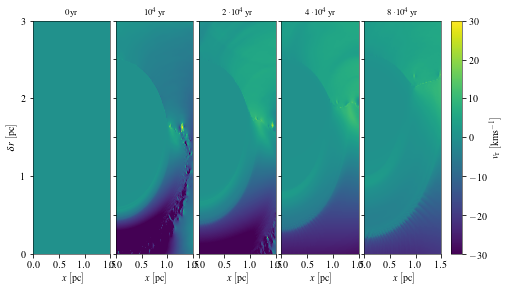

In [13]:
execfile('pysrc/RPC_Hydro.py')
iSnapshots = [0,100,200,400,800]
cb = nTplot2D_new(qGP,iSnapshots,('v_r',),rngs=((-30,30),))
# u.savefig(u.figureDir+'images_nT_%s.png'%qGP.name,dpi=600)

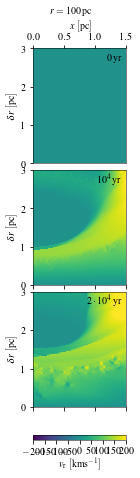

In [12]:
cb = nTplot2D((qRP,),iSnapshots,('v_r',),rngs=((-200,200),))
# u.savefig(u.figureDir+'images_nT.png')

# for Omer

In [2]:
qRP = pp.Run('B2D_N2048_R100_100',601,r=100.,v0=u.ld.pc/u.ld.yr,L0=u.ld.pc,rho0=1e-20,L=2.5e+12*u.ld.Lsun,
           optFrac=0.514)#,varsToRead=('rho','NHI'))#'ionx','prs'))

In [57]:
execfile('pysrc/RPC_Hydro.py')
import os

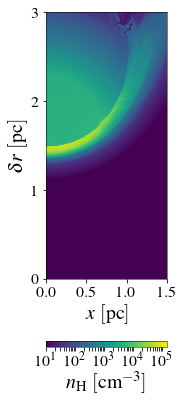

In [58]:
forOmer(qRP,iT=200,var='nH',rng=(10,1.5e5),ix=205)

# for Movie

In [27]:
framesForMovieMultiProcessor(6,(qRP,qGP),min_iT=0,max_iT=375,variables=('nH',),rngs=((10,1.5e5),))

In [3]:
framesForMovieMultiProcessor(6,(qGP,),min_iT=0,max_iT=1296,variables=('nH',),rngs=((10,1.5e5),))

loading snapshot #0
loading snapshot #5
loading snapshot #15
loading snapshot #10
loading snapshot #20
loading snapshot #25
loading snapshot #30
loading snapshot #35
loading snapshot #40
loading snapshot #45
loading snapshot #50
loading snapshot #55
loading snapshot #60
loading snapshot #65
loading snapshot #70
loading snapshot #75
loading snapshot #80
loading snapshot #85
loading snapshot #90
loading snapshot #95
loading snapshot #100
loading snapshot #105
loading snapshot #110
loading snapshot #115
loading snapshot #120
loading snapshot #125
loading snapshot #130
loading snapshot #135
loading snapshot #140
loading snapshot #145
loading snapshot #150
loading snapshot #155
loading snapshot #160
loading snapshot #165
loading snapshot #170
loading snapshot #175
loading snapshot #180
loading snapshot #185
loading snapshot #190
loading snapshot #195
loading snapshot #200
loading snapshot #205
loading snapshot #210
loading snapshot #215
loading snapshot #220
loading snapshot #225
loading sn

In [3]:
qRP = pp.Run('B2D_N2048_R100_100',500,r=100.,v0=u.ld.pc/u.ld.yr,L0=u.ld.pc,rho0=1e-20,L=2.5e+12*u.ld.Lsun,
           optFrac=0.514,varsToRead=('rho','NHI'))

In [29]:
framesForRPCMovieMultiProcessor(6,qRP,min_iT=0,max_iT=375,var='nH',rng=(10,1.5e5),ix=205)

In [6]:
execfile('pysrc/RPC_Hydro.py')

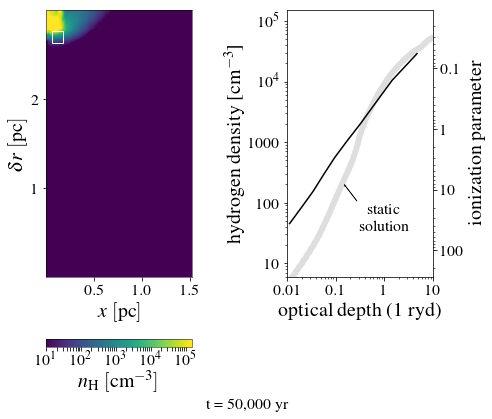

In [16]:
RPC_movie(qRP,iT=500,var='nH',rng=(10,1.5e5),ix=10,dx=5)

In [90]:
(30*un.km/un.s)**2, (1e46*un.erg/un.s/(4*pi*100**2*un.pc**2*cons.c) * 0.1 / (1e3*un.cm**-3*cons.m_p)).to('km**2/s**2')

(<Quantity 900. km2 / s2>, <Quantity 1666.75038584 km2 / s2>)

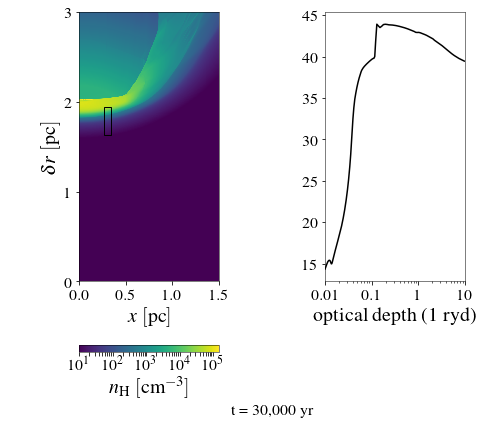

In [85]:
velocity_profile(qRP,iT=300,var='nH',rng=(10,1.5e5),ix=205)

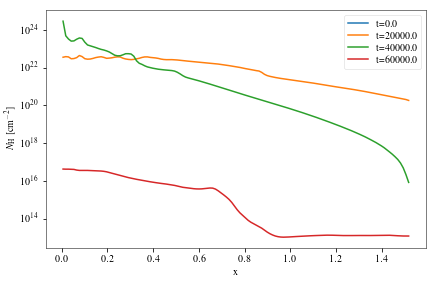

In [8]:
u.figure();
[u.plot(qRP[i].x.cgs(),qRP[i].NH.cgs()[-1,:],
        label='t=%s'%u.nSignificantDigits(qRP[i].t.cgs(),2)) for i in iSnapshots]
u.semilogy()
u.xlabel('x'); u.ylabel(r'$N_{\rm H}$ [cm$^{-2}$]'); u.legend()
u.mysavefig('column_density')

In [10]:
skewers((qGP,),'r',('v_r',),rngs=((-200,200),), iTs=iSnapshots,ix=10,logy=False)
#u.mysavefig('skewers_vs_dr')

NameError: name 'qGP' is not defined

figure 6: n,T,P skewers:
* why is T~10^4K all the way??
* timesteps should be ~10^5 yr, add t=0
* why does low-nH front in RP solution not reach higher T?
* compression effect should be stronger in r=100 run

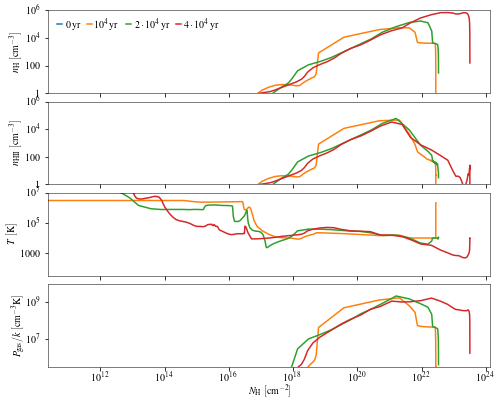

In [25]:
skewers((qRP,),'NH',('nH','nHII','T','P2k'),rngs=rngs, iTs=iSnapshots,logx=True,ix=5)

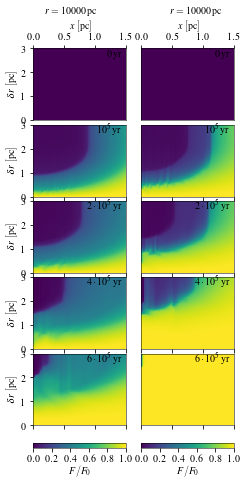

In [14]:
nTplot2D((qGP,qGP2),iSnapshots,('F2F0',),rngs=((0,1),))
# u.savefig(u.figureDir+'images_fluxfrac.png')

figure 7: images of absorbed fraction

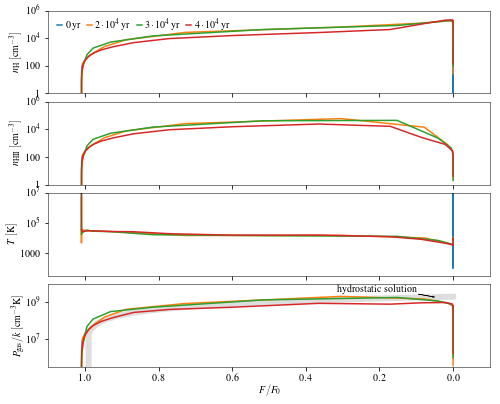

In [18]:
skewers((qRP,),'F2F0',('nH','nHII','T','P2k'),rngs=rngs, iTs=iSnapshots,ix=20)
# u.mysavefig('skewers_vs_absflux')

figure 8: skewers vs. absorbed flux fraction
* why isn't T vs F/F0 constant???
* wiggle at 10^5 year could be do to inaccurate calculation of mu in python code

In [6]:
execfile('pysrc/RPC_Hydro.py')
import os

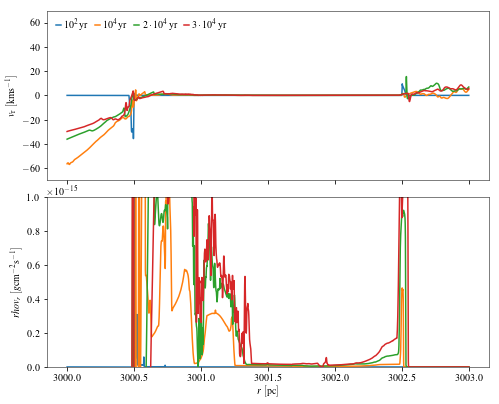

In [9]:
iSnapshots = [1,100,200,300]
skewers((qGP,),'r',('v_r','mass_flux'),rngs=((-70,70),(0,1e4*1e-24*1e5)), iTs=iSnapshots,ix=0,logy=False)
# u.mysavefig('skewers_vs_absflux')

In [10]:
skewers((qGP,),'r',('T','nH'),rngs=((1e3,1e5),(10,1000)), iTs=iSnapshots,ix=0)
# u.mysavefig('skewers_vs_absflux')

In [12]:
(14*un.km/un.s)**2 * u.ln(10.)

<Quantity 451.30667823 km2 / s2>

In [13]:
25**2

625

In [11]:
((cons.k_B*1.5e4*un.K / (0.6*cons.m_p))**0.5).to('km/s')

<Quantity 14.36523322 km / s>

In [ ]:
nTplot2D((qRP,qGP),iSnapshots,('Lgas2Omega','Liondust2Omega'),rngs=((0,1e46),(0,1e46)))
# u.savefig(u.figureDir+'images_L.png')

figure 9: L images
* normalization should be to total cloud luminosity?
* same range of dust and gas
* dust luminosity calculation inaccurate
* colormap
* colorbar location and format
* note radii
* y-axis is delta-r rather than r
* square panels, not rectangles
* times should go up to 200,000 yr
* explain Xi

In [13]:
0.01*un.pc / (2*cons.G*1e9*un.Msun/cons.c**2).to('pc')

<Quantity 104.48412772>

In [14]:
(1e46*un.erg/un.s/(4*pi*0.01**2*un.pc**2*cons.c*2*cons.k_B*1e4*un.K)).to('cm**-3')

<Quantity 1.00961365e+13 1 / cm3>

In [78]:
reload(Table)

<module 'Table' from 'pysrc/Table.py'>

In [79]:
(qRP[0].F0.cgs()*un.erg*un.s**-1*un.cm**-2 * pp.ionFluxFraction / pp.meanhnu / cons.c).to('cm**-3').mean()

<Quantity 2319.86314689 1 / cm3>

In [81]:
Table.plotCoolingTime(qRP.netCoolingTable,log(_.value))
u.mysavefig('tcools')

15.0 18.0 -
15.0 23.0 --
23.0 18.0 -.
23.0 23.0 :
